# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Getting and Cleaning the Data- EDA

In [ ]:
df = pd.read_csv('heart 2.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Normalization/Standardization 
Standardizing features by removing mean and scaling to unit variance

In [ ]:
scaler = StandardScaler()                                               
scalable_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]
df[scalable_columns] = scaler.fit_transform(df[scalable_columns])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 33.3 KB


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


# Data Visualization

<Axes: >

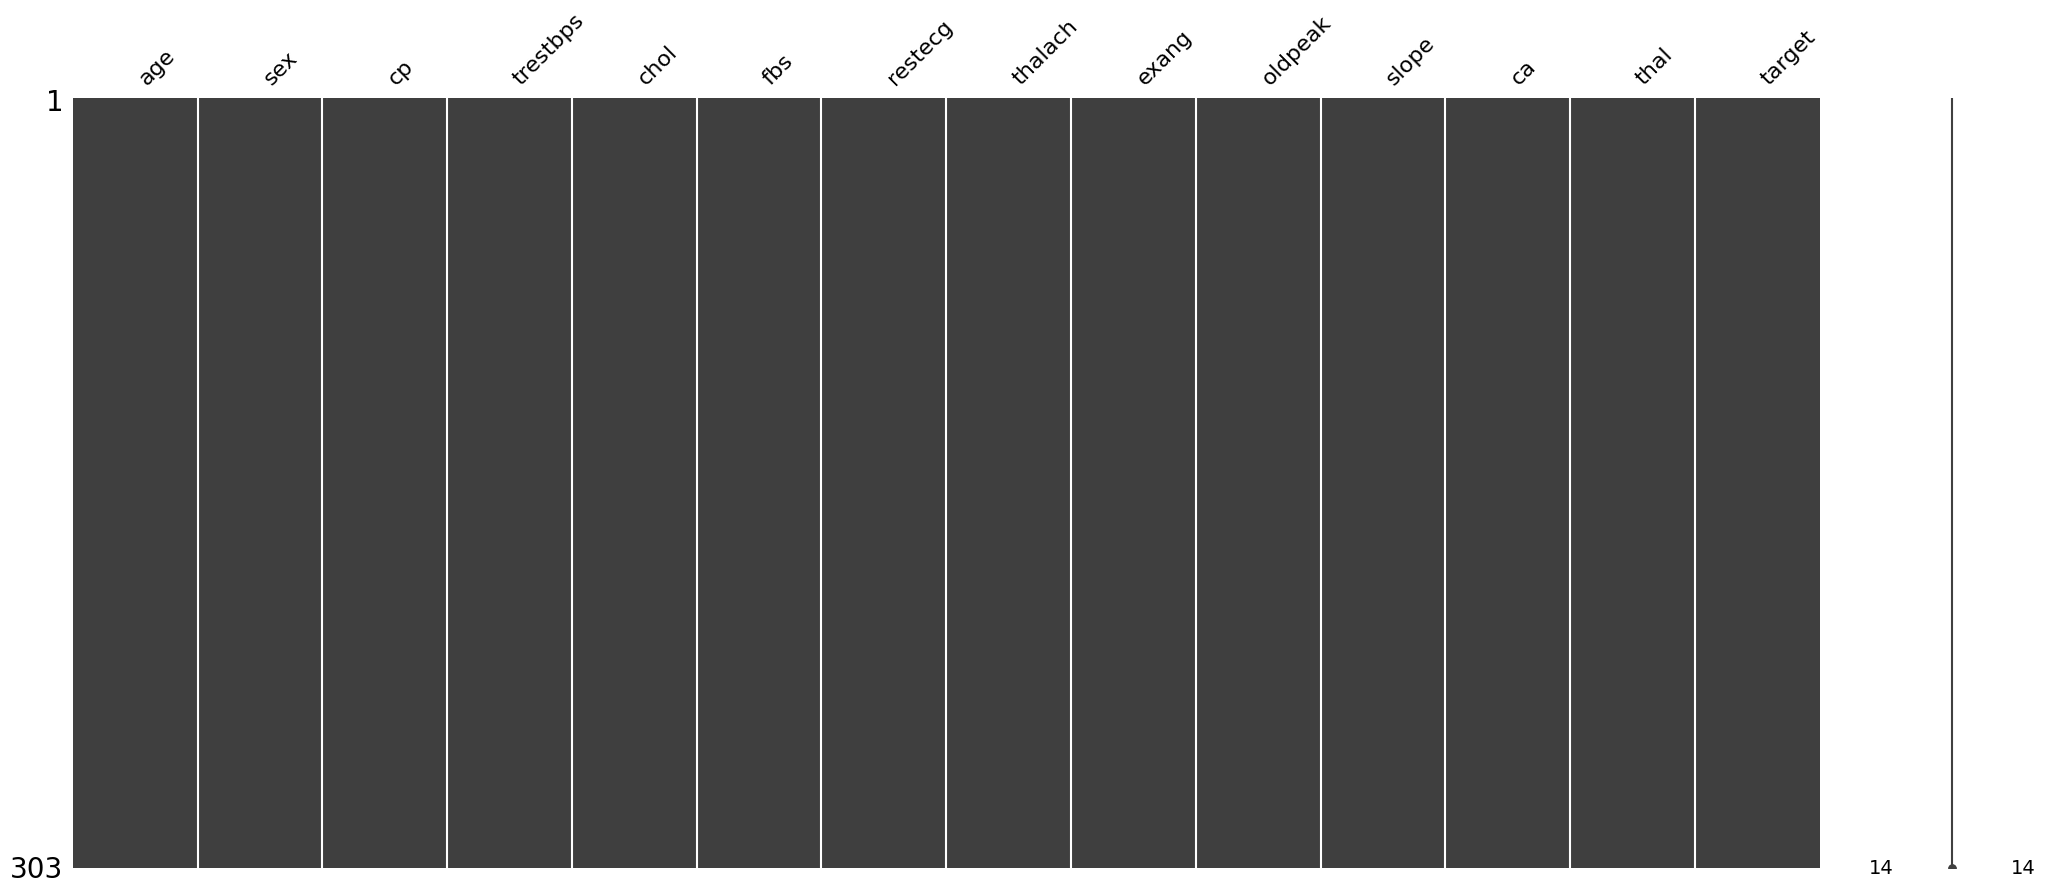

In [ ]:
import missingno as msn 
msn.matrix(df)

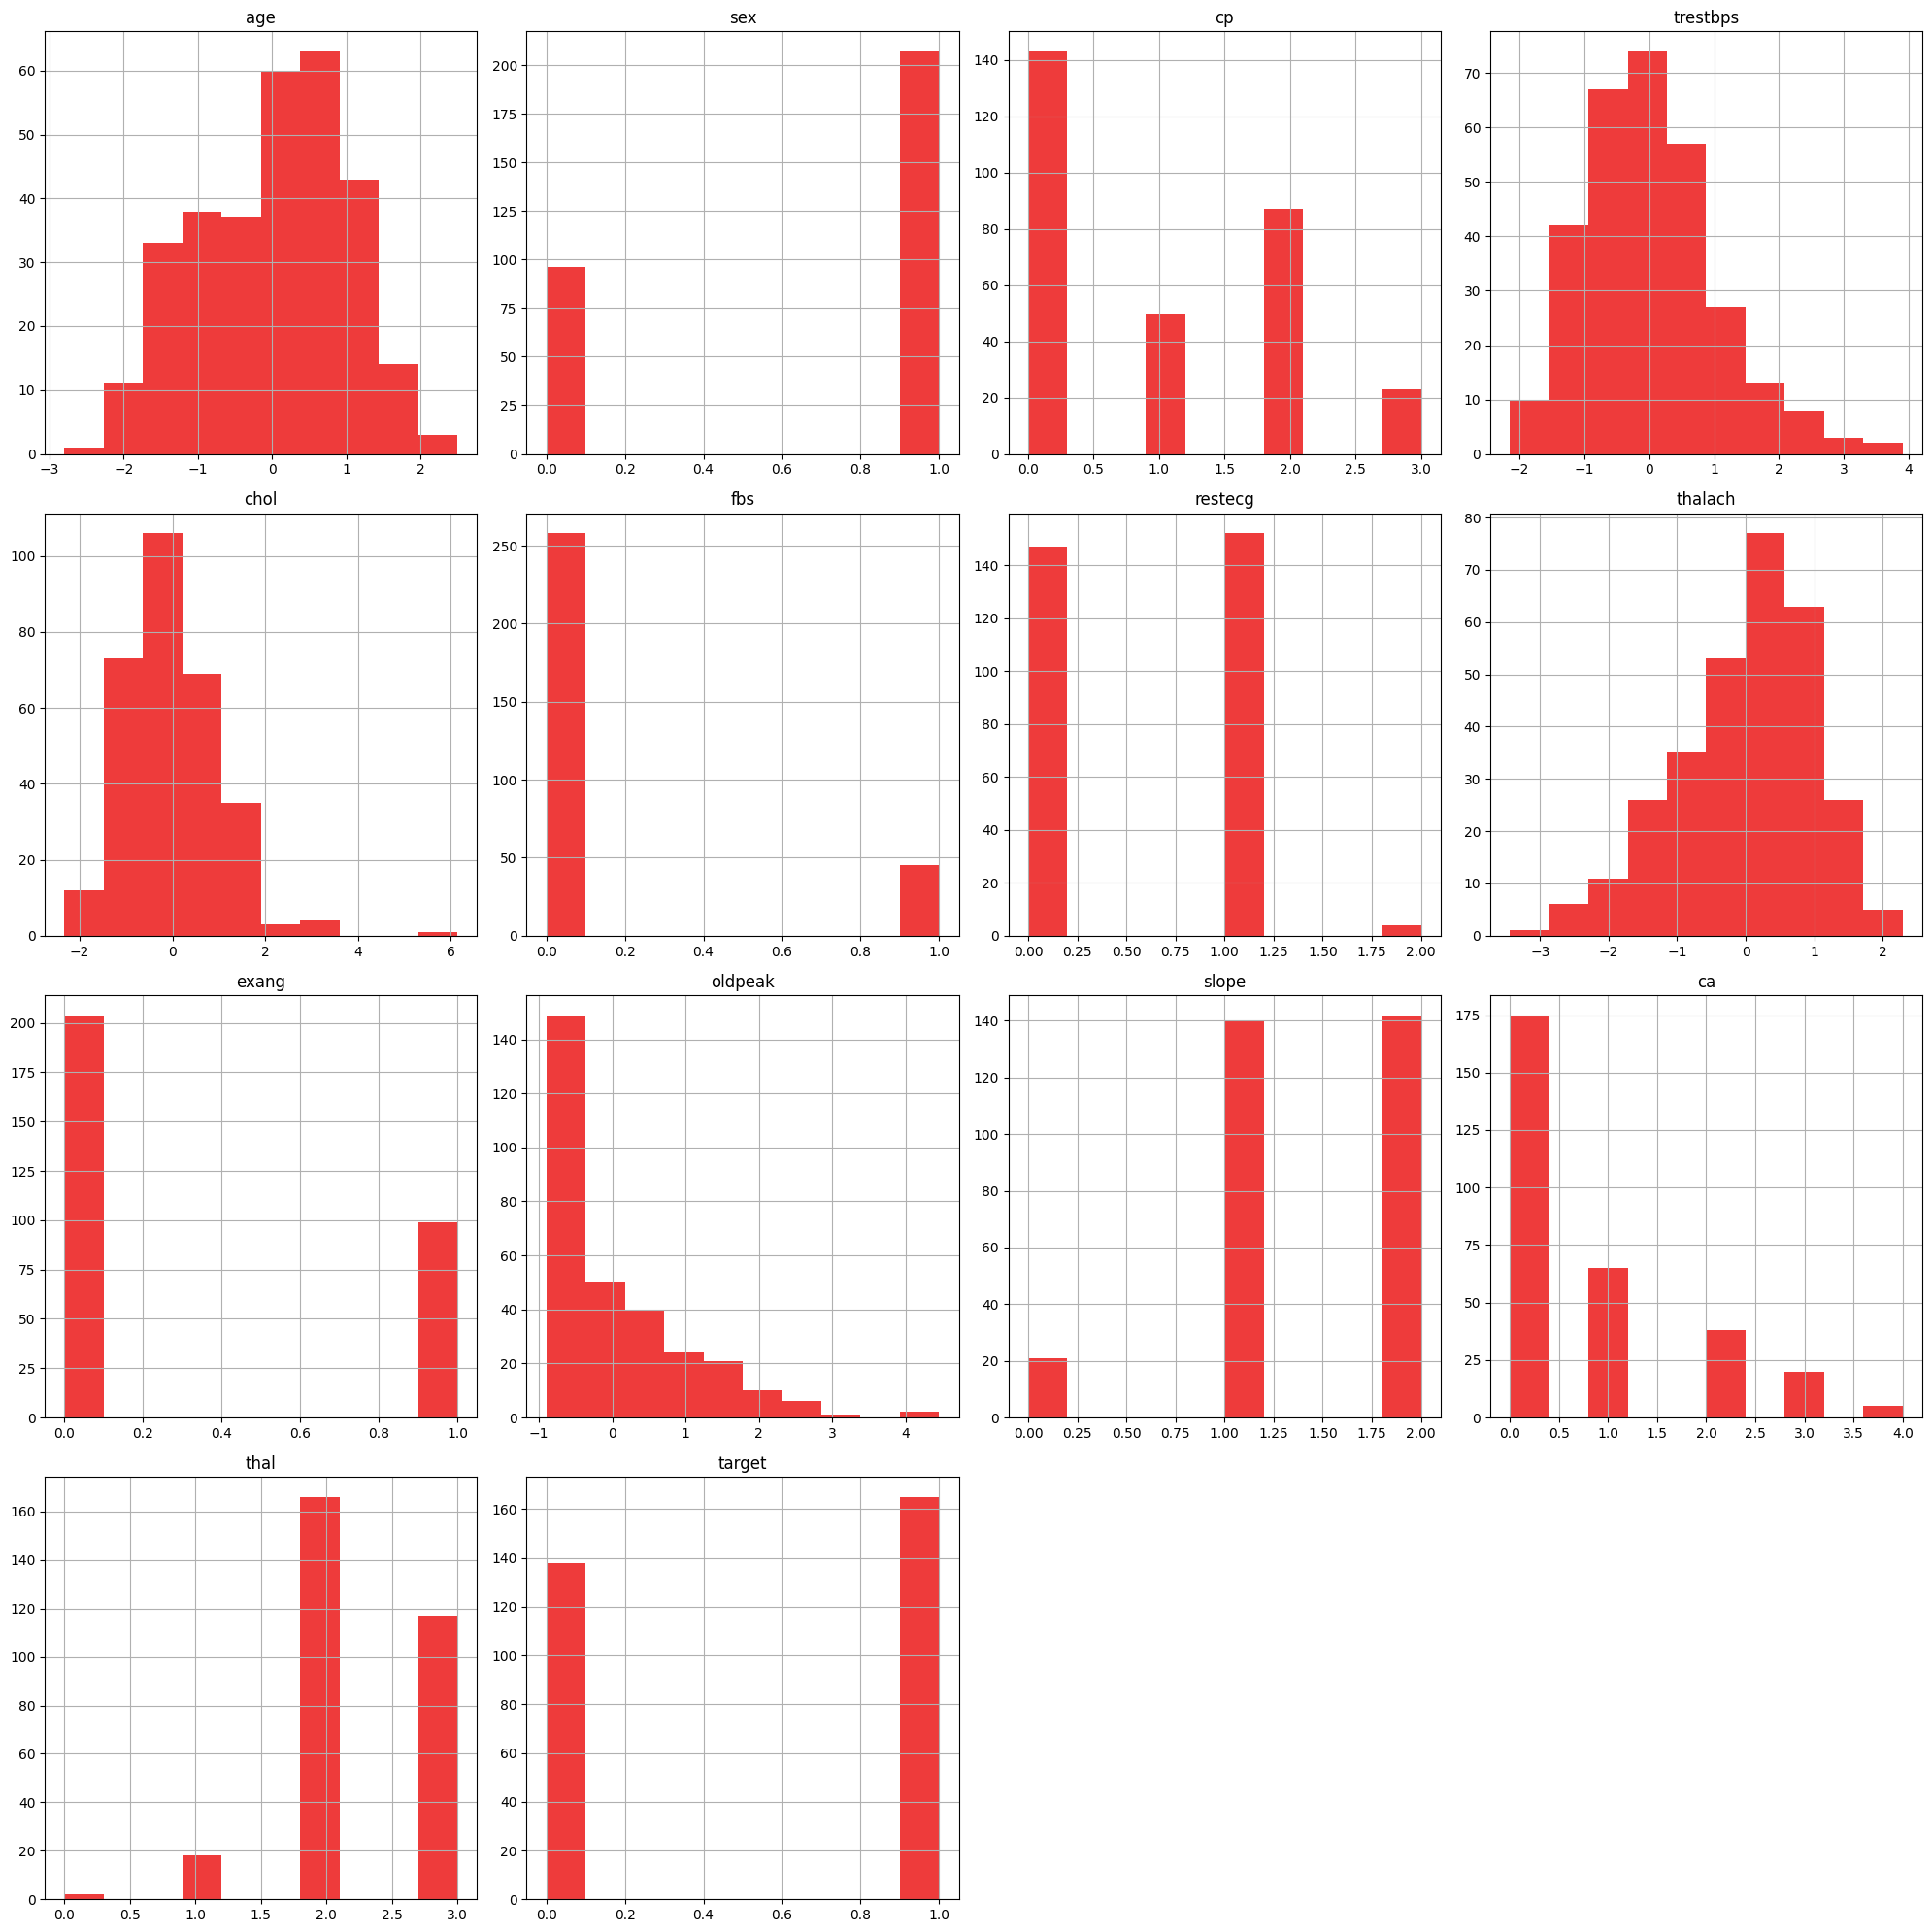

In [ ]:
df.hist(figsize = (20,20),color='#EE3B3B')
plt.tight_layout()
plt.show() 

In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
Hdislabel = ['Have heart disease','Do not have heart disease'] #2 categories of data
val_counts = [165,138] # values of 2 categories
#pie figure draw 
fig = px.pie(values=val_counts,names=Hdislabel, #assigning value= count value as we wook [508,409] & #names=will be returned by the Hdislabel function 
             color=Hdislabel, #labeled colour to pie chart 
             color_discrete_map={'Have heart disease':'#FF4500',  #adding colour to pie chart
                                 'Do not have heart disease':'#FFFF00'},
             title='Heart disease count') #top title to pie figure

fig.show() #display figure

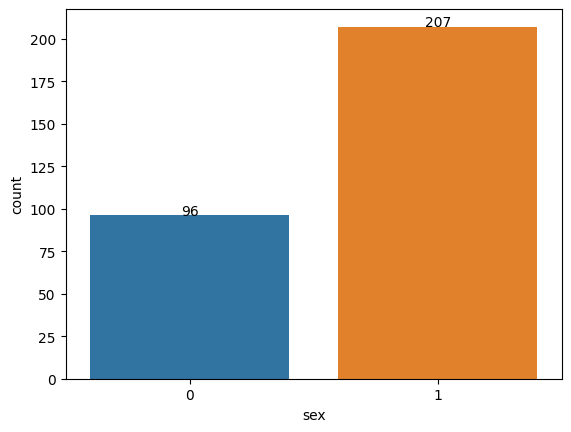

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x="sex", data=df)  

for p in ax.patches:
    height = p.get_height() 
    ax.text(p.get_x() + p.get_width()/2, height+0.3,'{:.0f}'.format(height), ha="center")

In [ ]:
print(f"{len(df[(df['sex']==1) & (df['target']==1)])} male")
print(f"{round(len(df[(df['sex']==1) & (df['target']==1)])/len(df[df['sex']==1])*100,2)}% of male are diagnosed to have heart disease among 207 male")

93 male
44.93% of male are diagnosed to have heart disease among 207 male


<Figure size 2000x2000 with 0 Axes>

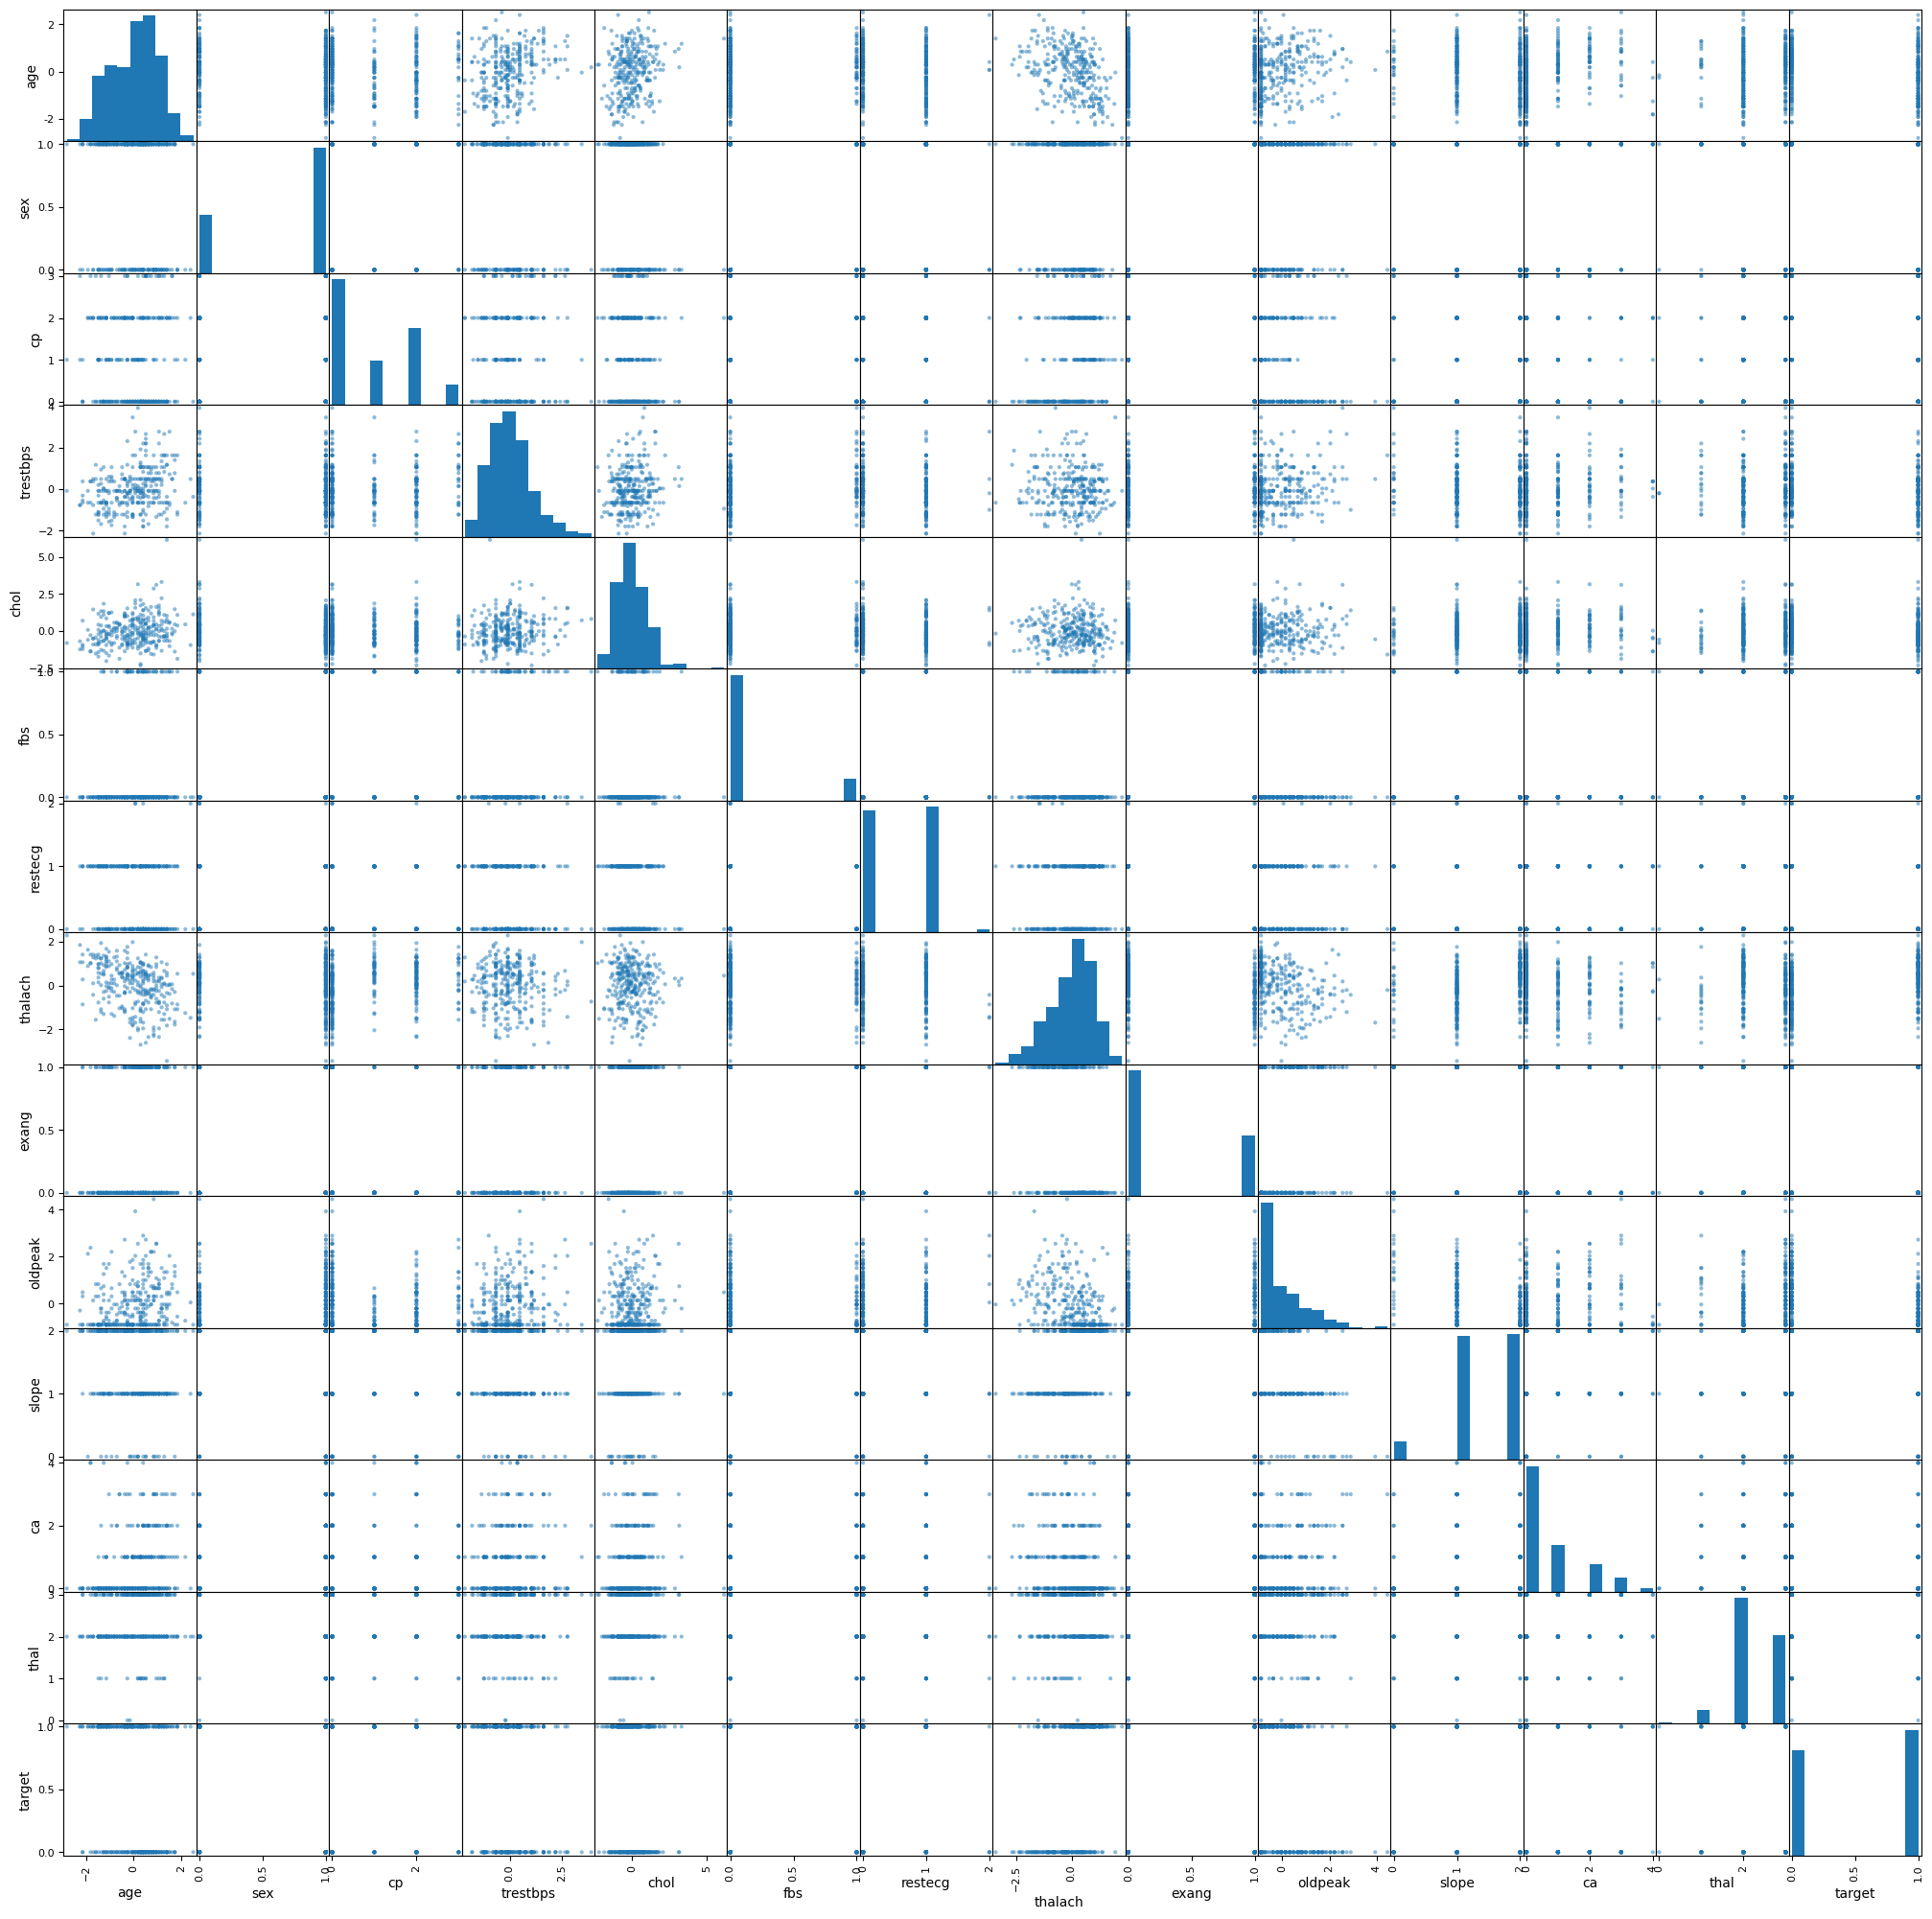

In [ ]:
plt.figure(figsize=(20,20))
from pandas.plotting import scatter_matrix
p=scatter_matrix(df,figsize=(25, 25))  

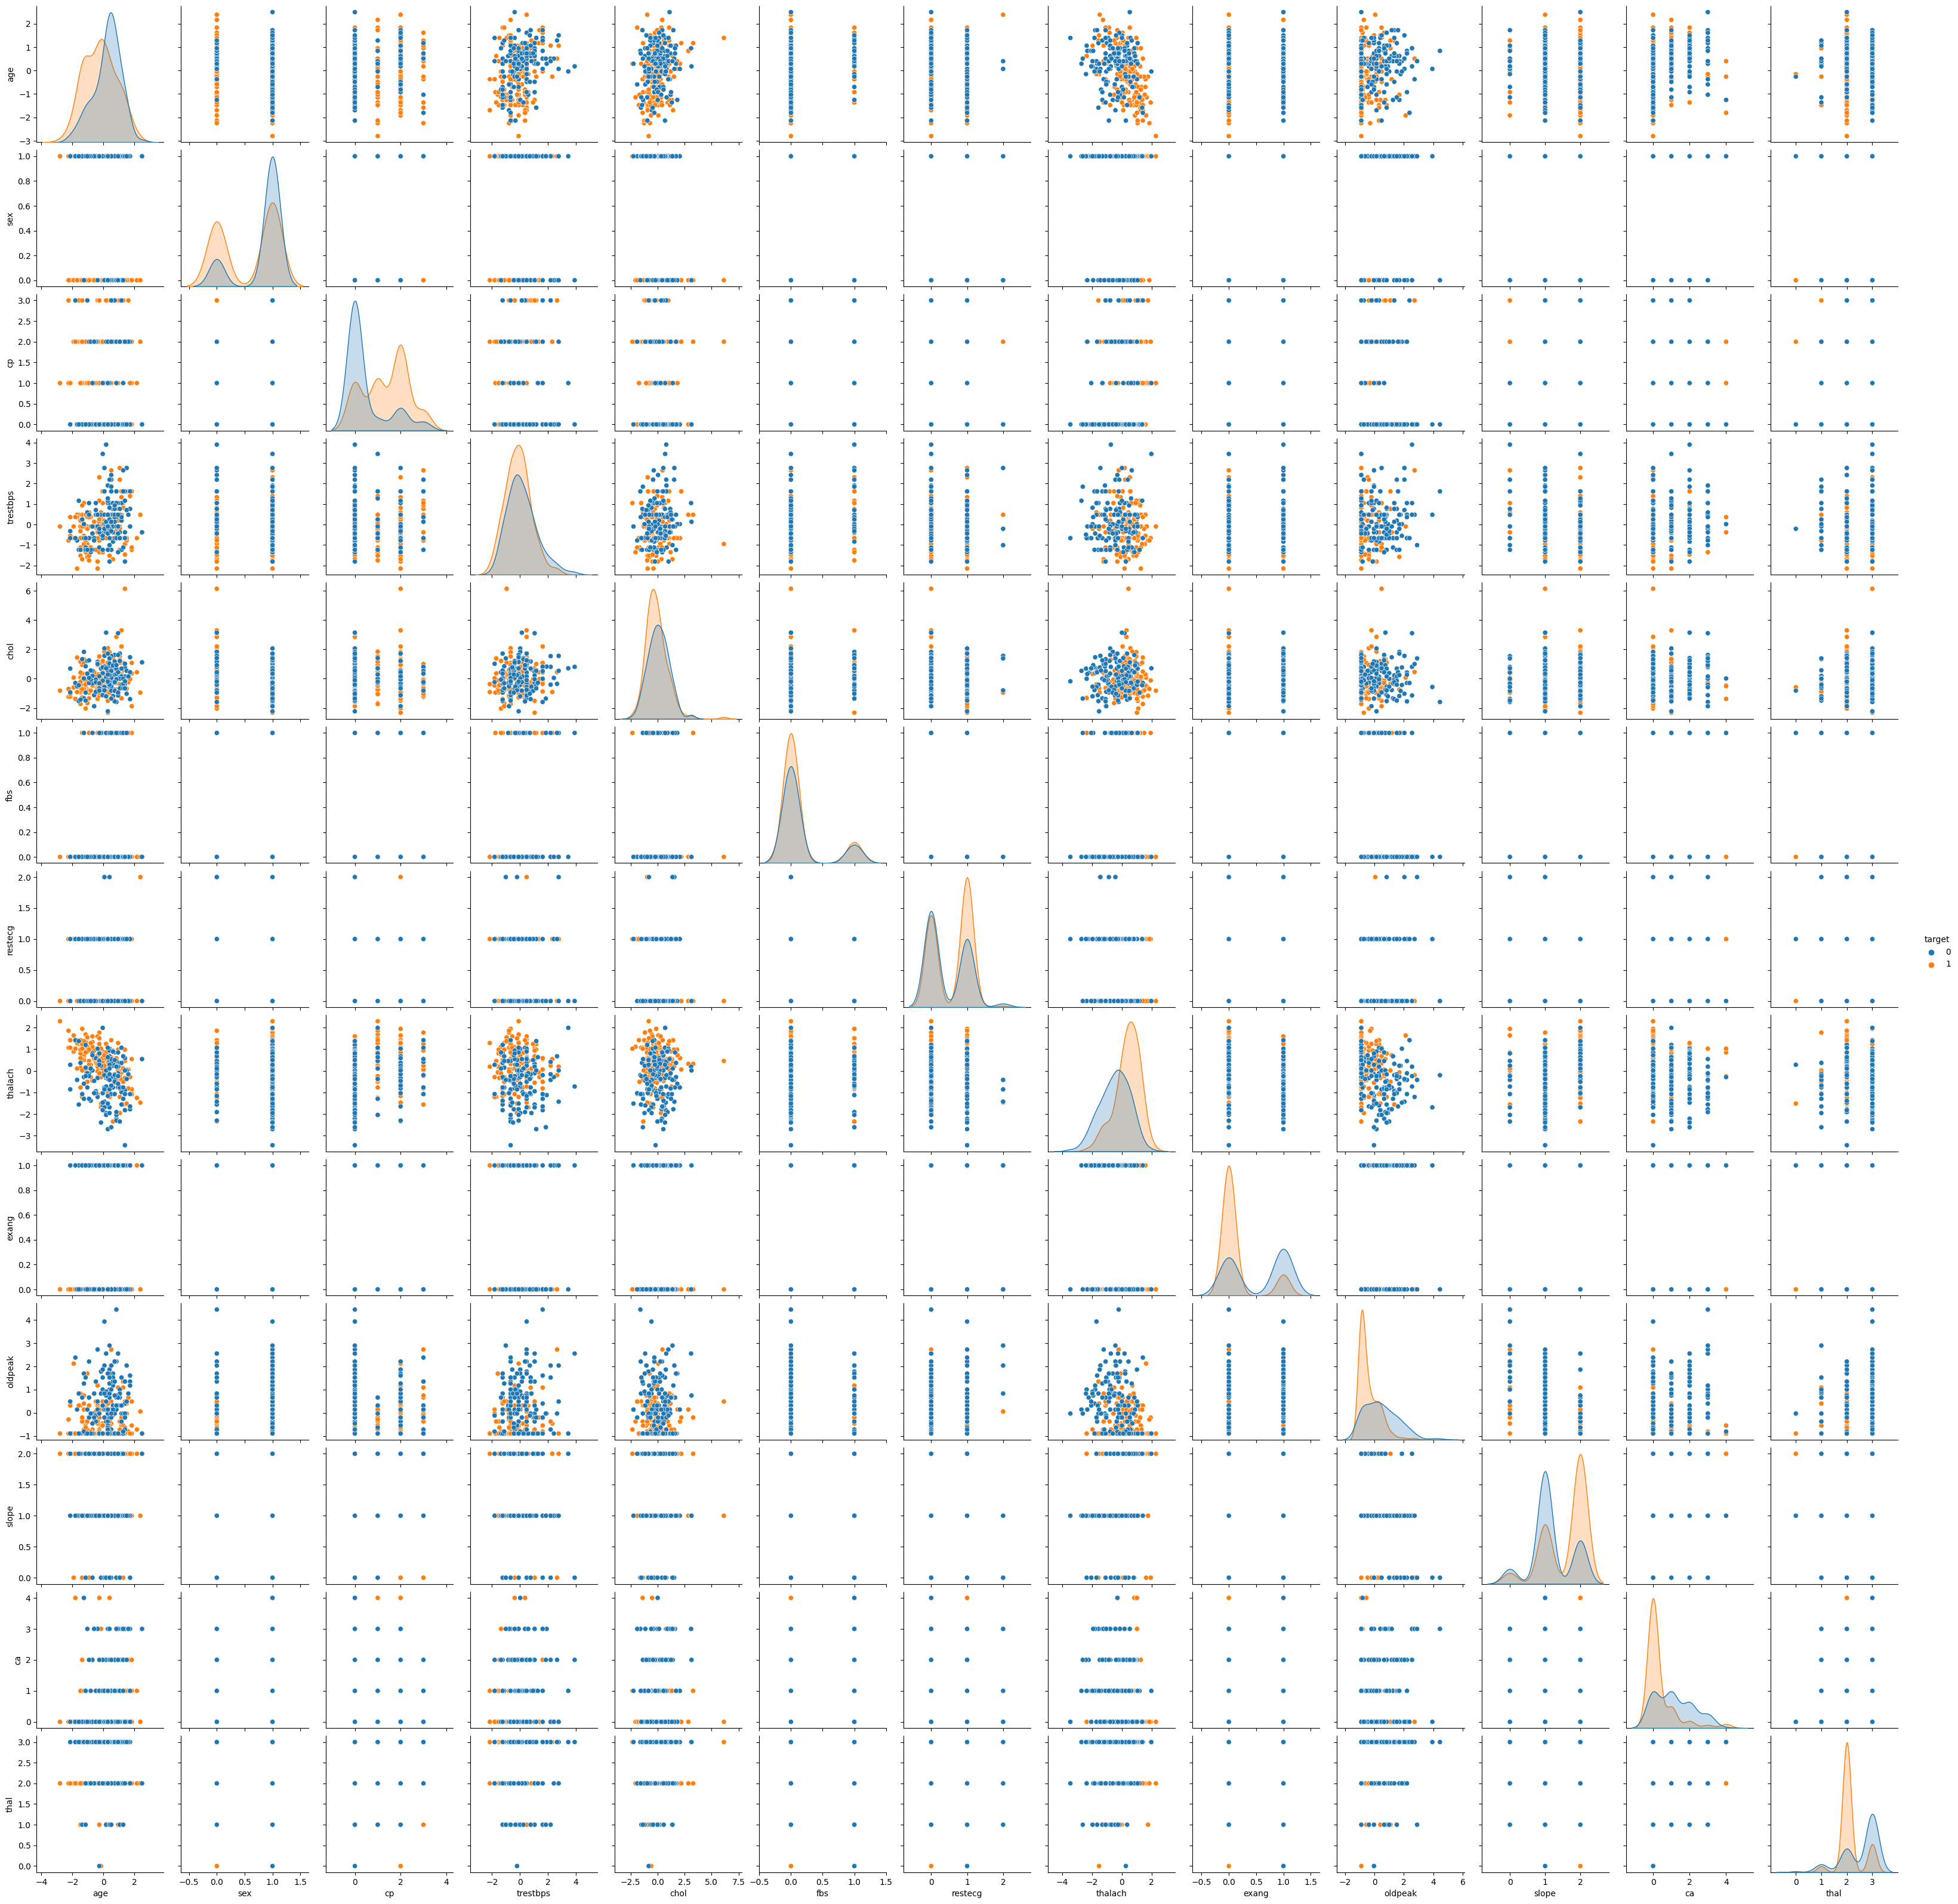

In [ ]:
p=sns.pairplot(df, hue = 'target') 

# Models

In [ ]:
df["target"] 

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
y = df["target"]
X = df.drop(["target"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## KNN


In [ ]:
knn_scores=[]
for k in range(1,40):
  knn_classifier=KNeighborsClassifier(n_neighbors=k)
  knn_classifier.fit(X_train,y_train)
  knn_scores.append(knn_classifier.score(X_test,y_test))

best_choice_for_k = np.argmax(knn_scores)+1
print(f'Best choice of k : {best_choice_for_k}')

Best choice of k : 12


In [ ]:
knn_classifier=KNeighborsClassifier(n_neighbors=best_choice_for_k)
knn_classifier.fit(X_train,y_train)
y_pred=knn_classifier.predict(X_test)
print(f'Accuracy:{np.sum(y_pred==y_test)/len(y_test)}')

Accuracy:0.8852459016393442


## SVM

In [ ]:
svc_scores = []
kernels = ['linear','poly','rbf','sigmoid']
for i in range(len(kernels)):
  svc_scores_c=[]
  for ch in range(1,11):
    if kernels [i]=='poly':
      svc_scores_poly=[]
      for d in range(3,10):
        svc_classifier = SVC(kernel =kernels[i], C=ch, degree=d)
        svc_classifier.fit(X_train, y_train)
        svc_scores_poly.append(svc_classifier.score(X_test,y_test))
      print(f'Best polynomial score: {np.argmax(svc_scores_poly)+3}')
      svc_scores_c.append(svc_scores_poly[np.argmax(svc_scores_poly)])
    else:
      svc_classifier = SVC(kernel = kernels[i], C=ch)
      svc_classifier.fit(X_train, y_train)
      svc_scores_c.append(svc_classifier.score(X_test, y_test))
  print(f'Best choice of c for {kernels[i]}: {np.argmax(svc_scores_c)+1}')
  svc_scores.append(svc_scores_c[np.argmax(svc_scores_c)])
print(f'Best choice of k: {kernels[np.argmax(svc_scores)]}')        

Best choice of c for linear: 4
Best polynomial score: 3
Best polynomial score: 3
Best polynomial score: 3
Best polynomial score: 3
Best polynomial score: 3
Best polynomial score: 4
Best polynomial score: 3
Best polynomial score: 4
Best polynomial score: 4
Best polynomial score: 3
Best choice of c for poly: 6
Best choice of c for rbf: 1
Best choice of c for sigmoid: 1
Best choice of k: linear


In [ ]:
svc_classifier = SVC(kernel="rbf", C=1)
svc_classifier.fit(X_train, y_train)
print(svc_classifier.score(X_test, y_test))

0.8688524590163934


## Decision Tree

In [ ]:
dt_scores=[]
cr_scores=[]
for cr in ['gini','entropy']:
  for i in range(1, len(X.columns)+1):
    dt_classifier = DecisionTreeClassifier(criterion=cr, max_features=i, random_state=42)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))
  print(f'Best max_features for{cr}:{np.argmax(dt_scores)+1}')
  cr_scores.append(dt_scores[np.argmax(dt_scores)])
print(f'Best criterion:{"gini" if not np.argmax(cr_scores) else "entropy"}')

Best max_features forgini:6
Best max_features forentropy:6
Best criterion:gini


In [ ]:
from pandas.core.common import random_state
dt_classfier=DecisionTreeClassifier(criterion='gini',max_features=14, random_state=42)
dt_classifier.fit(X_train,y_train)
print(dt_classifier.score(X_test,y_test))

0.819672131147541


## Random Forest

In [ ]:
print('RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print(rate_people,"% of people predicted with heart-disease:")
score_rfc = score
out_rfc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

RandomForestClassifier
Training Score: 1.0
Testing Score: 0.8524590163934426
   Predicted
0          0
1          1
2          0
3          0
4          1
0.5409836065573771 % of people predicted with heart-disease:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## ANN

In [ ]:

model = Sequential([
    Dense(20, activation="relu"),
    Dropout(0.2),
    Dense(25, activation="relu"),
    Dense(45, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="relu"),
    Dense(2, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=5)
batches = 32
nr_epochs = 500

model.fit(X_train, y_train, batch_size=batches, epochs = nr_epochs)

Epoch 1/500
8/8 [==============================] - 2s 4ms/step - loss: 0.6734 - accuracy: 0.6281
Epoch 2/500
8/8 [==============================] - 0s 4ms/step - loss: 0.6447 - accuracy: 0.6446
Epoch 3/500
8/8 [==============================] - 0s 4ms/step - loss: 0.6399 - accuracy: 0.6405
Epoch 4/500
8/8 [==============================] - 0s 4ms/step - loss: 0.6000 - accuracy: 0.6860
Epoch 5/500
8/8 [==============================] - 0s 5ms/step - loss: 0.6106 - accuracy: 0.7149
Epoch 6/500
8/8 [==============================] - 0s 5ms/step - loss: 0.5667 - accuracy: 0.7273
Epoch 7/500
8/8 [==============================] - 0s 4ms/step - loss: 0.5694 - accuracy: 0.7686
Epoch 8/500
8/8 [==============================] - 0s 4ms/step - loss: 0.5268 - accuracy: 0.7727
Epoch 9/500
8/8 [==============================] - 0s 4ms/step - loss: 0.5345 - accuracy: 0.7686
Epoch 10/500
8/8 [==============================] - 0s 4ms/step - loss: 0.4969 - accuracy: 0.7851
Epoch 11/500
8/8 [===========

In [ ]:
model.evaluate(X_test, y_test, batch_size=32)

2/2 [==============================] - 0s 8ms/step - loss: 1.1977 - accuracy: 0.9016


[1.1976836919784546, 0.9016393423080444]

#CONCLUSION

##### KNN works best (88.5% accuracy). So we'll use KNN

DEPLOY MODEL

In [ ]:
import pickle                                                                                                                                          #library needed for saving the model

In [ ]:
filename = 'trained_model.sav'                                                                                                             #new variable with a new file saved in that variable
pickle.dump(knn_classifier, open(filename, 'wb'))                                                                                                   #model is loaded in knn coz of best accuracy
                                                                                                                                                                                 # write bianry

In [ ]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))                                                                                                        #load and read binary file

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51,92,88.09,17,121.22,100)

input_data_as_numpy_array = np.asarray(input_data)                                                                                                              #input to numpy array

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)                                                                                                     #predicting one instance

prediction = loaded_model.predict(input_data_reshaped)                                                                                                          
print(prediction)

if (prediction[0] == 0):
  print('The person is not diagnosed with Heart Disease')
else:
  print('The person is diagnosed with Heart Disease')

[0]
The person is not diagnosed with Heart Disease


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

